In [1]:
# Importing the required libraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data Reading
df_lead = pd.read_csv("C:/Users/Neemesh/Desktop\Leads.csv")
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking duplicated rows. 
df_lead[df_lead.duplicated()==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


By looking at above duplicate check, we can confirm there is no duplicate country records

In [4]:
df_lead.shape

(9240, 37)

Total 9240 rows and 37 columns

In [5]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

By looking above information we can confirm, that there is no invalid data types. Most of columns are either float or int
Except country which object type. Hence we can ignore without changind data type

In [6]:
#Relacing select with np.nan
df_lead = df_lead.replace('Select', np.nan)

In [7]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Checking null data
df_lead.isnull().sum()/len(df_lead)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
#Drop coulmns having more than 70% of missing values
df_lead=df_lead.drop(df_lead.loc[:,list(round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)>70)].columns, 1)


In [10]:
#Now we will analyse Lead Quality attribute
df_lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

Performing uni variate analysis for one by one variable and delete any missing value columns if required

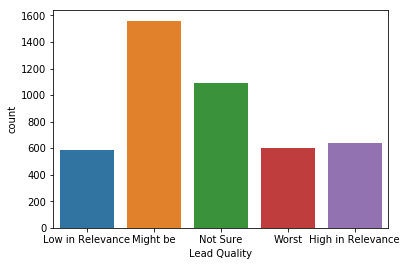

In [11]:
sns.countplot(df_lead['Lead Quality'])

There is not sure data which means no data available.

In [12]:
#Now relplace nan in Lead Quality atribute with not sure
df_lead['Lead Quality'] = df_lead['Lead Quality'].replace(np.nan, 'Not Sure')

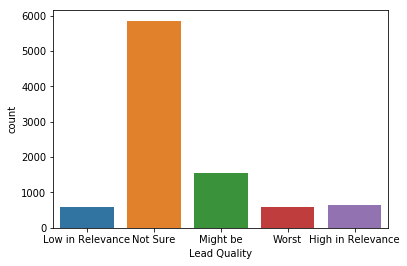

In [13]:
sns.countplot(df_lead['Lead Quality'])

Outlier and missing values analysis of below variables and impute/remove if require
- Asymmetrique Activity Index  
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score   

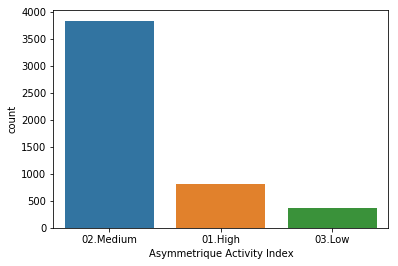

In [14]:
#Analyse Asymmetrique Activity Index and symmetrique Activity score
sns.countplot(df_lead['Asymmetrique Activity Index'])

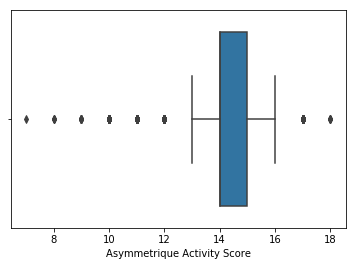

In [15]:
#Looking at this data looks good. We will analyse, outliers for Asymmetrique Activity Score
sns.boxplot(df_lead['Asymmetrique Activity Score'])

In [16]:
#By Looking this box plot we can under stand there are outliers also.
#Also there around 45% missing for Asymmetrique Activity Score
#Hence will remove both Asymmetrique Activity Index and Asymmetrique Activity Score
df_lead = df_lead.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score'],1)

In [17]:
df_lead.shape

(9240, 33)

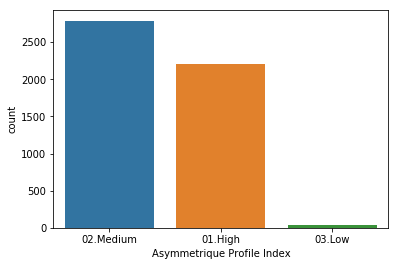

In [18]:
#Analyse Asymmetrique Profile Index and Profile score
sns.countplot(df_lead['Asymmetrique Profile Index'])

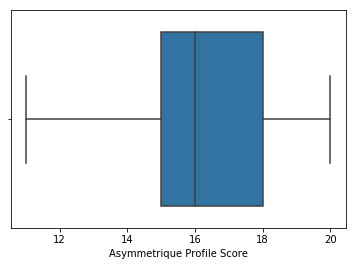

In [19]:
#Looking at this data looks good. We will analyse, outliers for Asymmetrique Profile Score
sns.boxplot(df_lead['Asymmetrique Profile Score'])

In [20]:
#There are no much outliers for this attribute, however there are around 45% missing values.
#Hence removing both Asymmetrique Profile Index and Asymmetrique Profile Score
df_lead = df_lead.drop(['Asymmetrique Profile Index', 'Asymmetrique Profile Score'],1)

In [21]:
df_lead.shape

(9240, 31)

In [22]:
# Verify missing values percentage after dropping the variables
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [23]:
# Now take a look at Tags which is having highest missing values now i.e 36%
df_lead['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

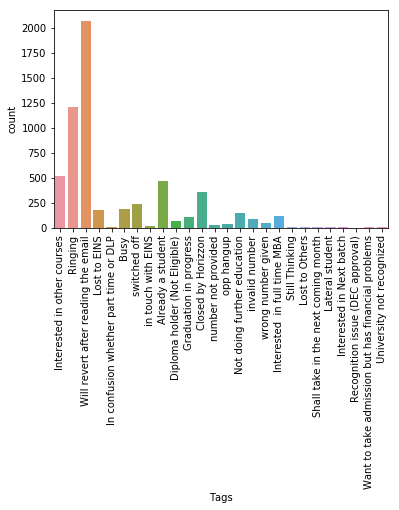

In [24]:
sns.countplot(df_lead['Tags'])
xticks(rotation = 90)

In [25]:
# Reaplacing Nan in Tags with Will revert after reading the email since it is top/highest count
df_lead['Tags'] = df_lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [26]:
# Verifying the percentage of missing values again
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

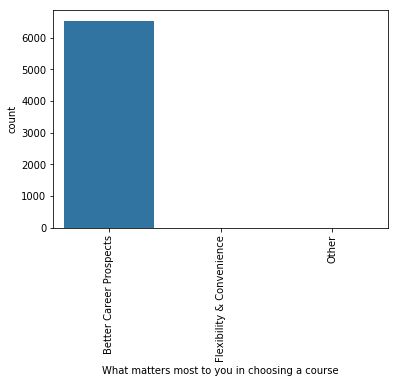

In [27]:
#Selecting next highet missing percentage variable What matters most to you in choosing a course having 29.32%
sns.countplot(df_lead['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [28]:
#Better Carerr Prospects is having highest. Hence replacing nan with same
df_lead['What matters most to you in choosing a course'] = df_lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [29]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [30]:
# Considering the next highest missing values variable What is your current occupation 29.11%
df_lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

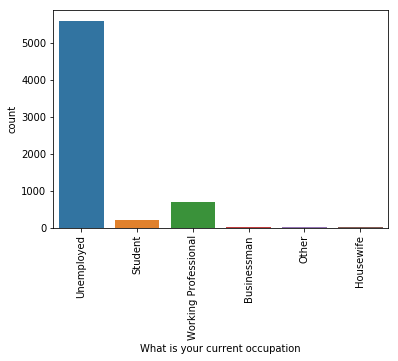

In [31]:
sns.countplot(df_lead['What is your current occupation'])
xticks(rotation = 90)

In [32]:
#Unemployed is having highest. Hence replacing nan with same
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [33]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [34]:
# Analyse the next highest missing values variable country 26.63%
df_lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

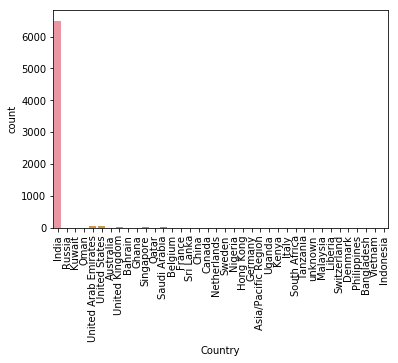

In [35]:
sns.countplot(df_lead['Country'])
xticks(rotation = 90)

In [36]:
# Replacing the NaN with India since it highest count
df_lead['Country'] = df_lead['Country'].replace(np.nan, 'India')

In [37]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [38]:
# Analyse the next highest missing values variable Specialization 15.56%
df_lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

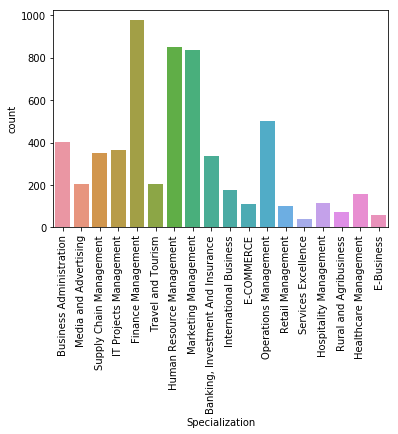

In [39]:
sns.countplot(df_lead['Specialization'])
xticks(rotation = 90)

In [40]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [41]:
# Analyse the next highest missing values variable city  15.37
df_lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

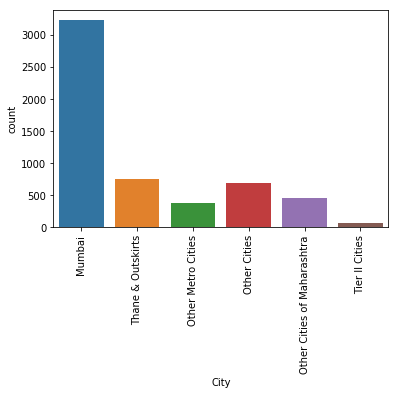

In [42]:
sns.countplot(df_lead['City'])
xticks(rotation = 90)

In [43]:
# Replacing the NaN with Mumbai since it highest count
df_lead['City'] = df_lead['City'].replace(np.nan, 'Mumbai')

In [44]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [45]:
# Analyse the next highest missing values variable Page Views Per Visit 1.48%
df_lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 <a list of 114 Text xticklabel objects>)

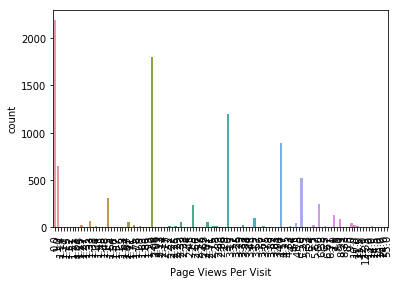

In [46]:
sns.countplot(df_lead['Page Views Per Visit'])
xticks(rotation = 90)

In [47]:
# Replacing the NaN with mean
df_lead['Page Views Per Visit'] = df_lead['Page Views Per Visit'].fillna((df_lead['Page Views Per Visit'].mean()))


In [48]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [49]:
# Consider TotalVisits with 1.48%
# Replacing the NaN with mean
df_lead['TotalVisits'] = df_lead['TotalVisits'].fillna((df_lead['TotalVisits'].mean()))

In [50]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [51]:
# Analyse the next highest missing values variable Last Activity 1.11%
df_lead['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

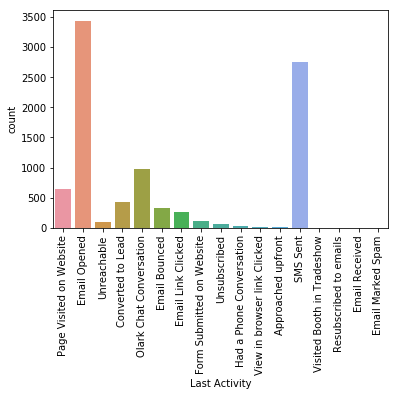

In [52]:
sns.countplot(df_lead['Last Activity'])
xticks(rotation = 90)

In [53]:
# Replacing the NaN with Email Opened since it highest count
df_lead['Last Activity'] = df_lead['Last Activity'].replace(np.nan, 'Email Opened')

In [54]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [55]:
# Analyse the next highest missing values variable Lead Source 0.39%
df_lead['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

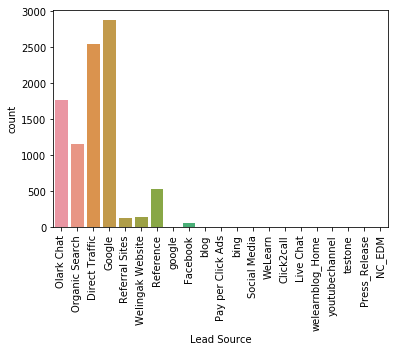

In [56]:
sns.countplot(df_lead['Lead Source'])
xticks(rotation = 90)

In [57]:
# Replacing the NaN with Google since it highest count
df_lead['Lead Source'] = df_lead['Lead Source'].replace(np.nan, 'Google')

In [58]:
# Verifying the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Now 0 missing % data. Will continue with EDA

# Exploratory Data Analysis

Univariate Analysis for one by one variable

In [59]:
# Analysing Converted data
Converted = (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100
Converted

38.53896103896104

So over all 38.53% converted

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

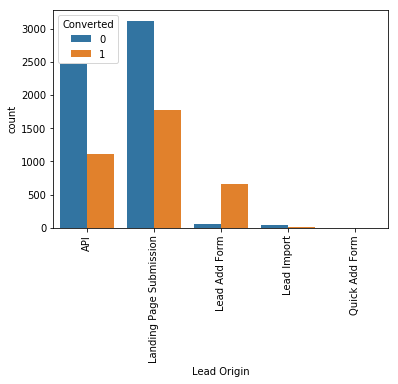

In [60]:
#Analyse Lead origin with Converted data
sns.countplot(x = "Lead Origin", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Infer and Analysis:- 
- "API" and "Landing Page Submission" have around 35% conversion rate
- "Lead Add Form" is having more than 90% conversion rate but count of lead are not very high.
- "Lead Import" and "Quick Add Form" are very less in count.

Improvement Areas:-
- Need to focus more on improving lead converion of API and Landing Page Submission 
- Also, need to generate more leads from Lead Add Form

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

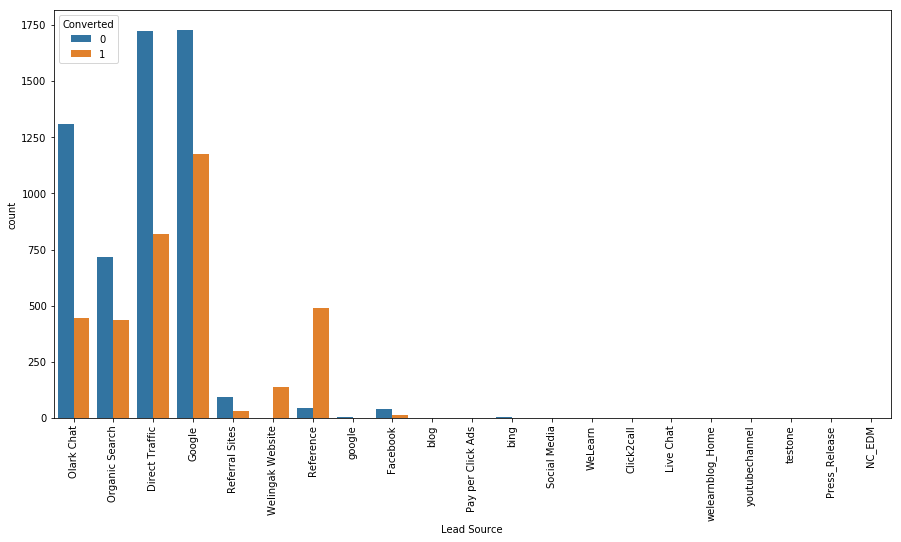

In [61]:
#Analysing Lead Source
plt.figure(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_lead)
xticks(rotation = 90)

In [62]:
# Group the variables which has a very less value or no values in the a single group as "Misc"
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['blog','Pay per Click Ads','bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Misc')

In [63]:
#Replacing google with Google.
df_lead['Lead Source'] = df_lead['Lead Source'].replace(['google'], 'Google')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

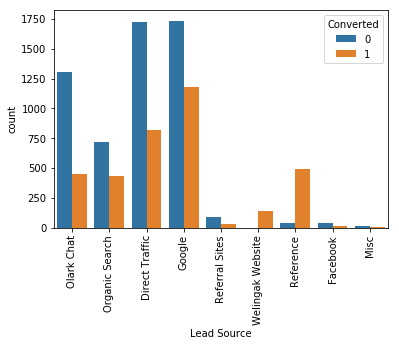

In [64]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Infer and analysis:- 
- "Direct traffic" and "Google" having more number of leads compared to other 
- Conversion Rate of "Welingak website" leads and "Reference" leads are high.

Improvement Areas:-
- Need to focus more on improving lead converion of olark chat, organic search, direct traffic, and google leads
- Also, need to generate more leads from reference and welingak website.


(array([0, 1]), <a list of 2 Text xticklabel objects>)

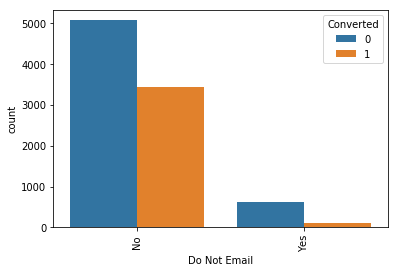

In [65]:
#Analysing Do no Email abd Do no Call
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_lead)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

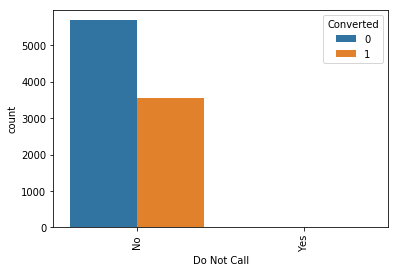

In [66]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_lead)
xticks(rotation = 90)

By looking at above Do Not Call and Do not Emails. There not much conversion rate. Hence moving with 
Total Visits


In [67]:
#Analysing Total visits
df_lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

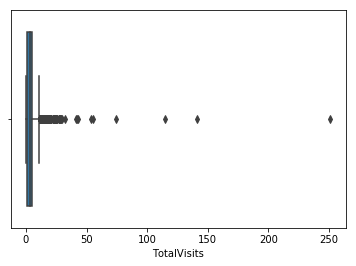

In [68]:
#Analysing outliers for Total visits
sns.boxplot(df_lead['TotalVisits'])

In [69]:
# As there are many outliers, We will try to cap to 95% value for analysis.
percentiles = df_lead['TotalVisits'].quantile([0.05,0.95]).values
df_lead['TotalVisits'][df_lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_lead['TotalVisits'][df_lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

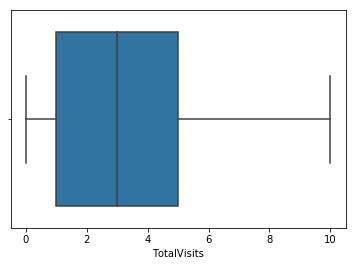

In [70]:
#Analysing outliers after cap
sns.boxplot(df_lead['TotalVisits'])

Now there are no outliers

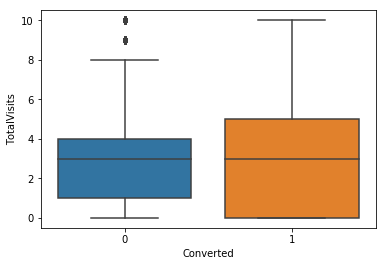

In [71]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_lead)

Analysis and Infer:-
- Here medians are same for both converted and not converted

Next steps:-
- Analyse Total time spent on website

In [72]:
#Analysing Total time spent on website
df_lead['Total Time Spent on Website'].describe(percentiles=[0.05,0.25,0.5,.60,0.70,.75,0.80, 0.85, 0.90, 0.95, 0.99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
60%       372.000000
70%       715.000000
75%       936.000000
80%      1087.200000
85%      1233.150000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

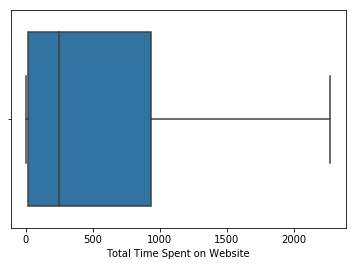

In [73]:
#Analysing outliers for Total Time Spent on Website
sns.boxplot(df_lead['Total Time Spent on Website'])

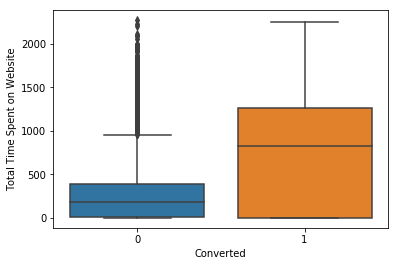

In [74]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_lead)

Analysis and Infer:-
- Leads for "Total Time Spent on Website" are more likely to convert

Improvement Areas:-
- Need to make sure website is user friendly so that user can spend more time on website


In [75]:
#Analyse Page views per visit
df_lead['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.5,.60,0.70,.75,0.80, 0.85, 0.90, 0.95, 0.99])

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
60%         2.500000
70%         3.000000
75%         3.000000
80%         4.000000
85%         4.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

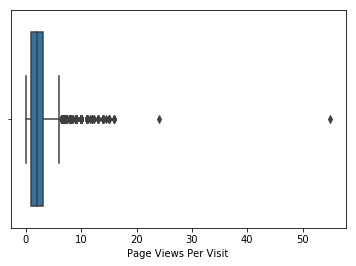

In [76]:
sns.boxplot(df_lead['Page Views Per Visit'])

In [77]:
# As there are many outliers, We will try to cap to 95% value for analysis
percentiles = df_lead['Page Views Per Visit'].quantile([0.05,0.95]).values
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

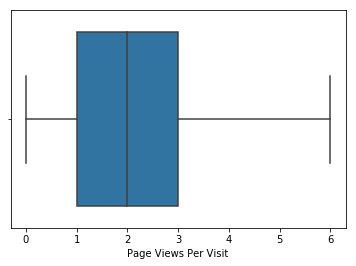

In [78]:
#Analysing outliers after cap
sns.boxplot(df_lead['Page Views Per Visit'])

Now there are no outliers

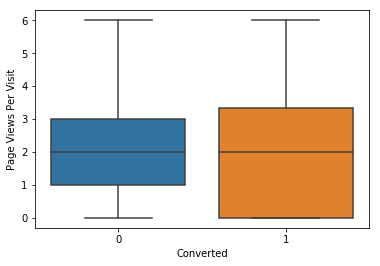

In [79]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_lead)

Analysis and Infer:-
- Here medians are same for both converted and not converted

Next steps:-
- Analyse Total time spent on Last Activity

In [80]:
#Analyse Last Activity
df_lead['Last Activity'].describe()

count             9240
unique              17
top       Email Opened
freq              3540
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

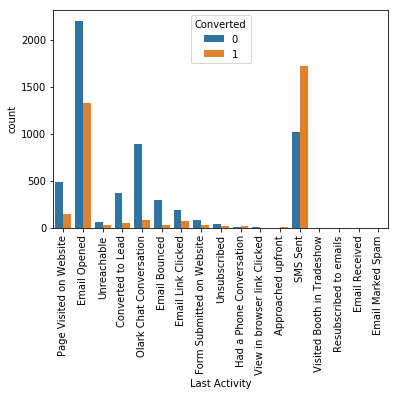

In [81]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df_lead)
xticks(rotation = 90)

In [82]:
# Grouping the variables which has a very less value or which has no values in the a single group as "Misc"
df_lead['Last Activity'] = df_lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Misc')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

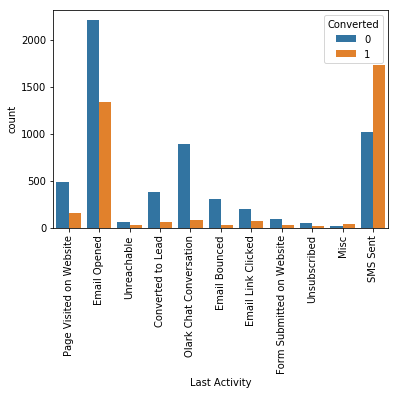

In [83]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analysis and Infer:-
- Email Opened has maximum lead rate.
- SMS Sent has the maximum convertion rate

In [84]:
#Analyse country
df_lead.Country.describe()

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

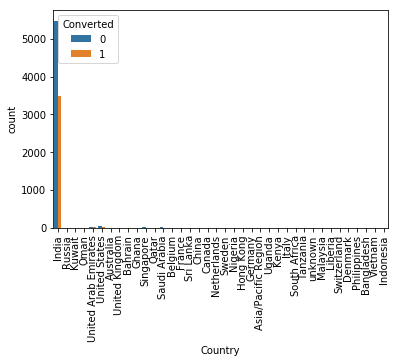

In [85]:
sns.countplot(x = "Country", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer
- Most of the values are only for 'India'
- Hence no inference can be drawn

In [86]:
#Analyse Specialization
df_lead.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [87]:
#Replace others with Misc
df_lead['Specialization'] = df_lead['Specialization'].replace(['Others'], 'Misc')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

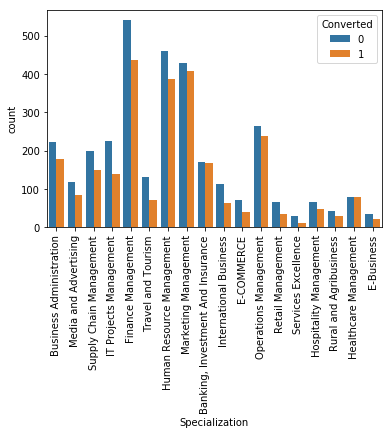

In [88]:
sns.countplot(x = "Specialization", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer:-
- Apart from select, Lead rates and coversion rates are quite less

Improvement Area:-
- Need to focus more on Specialization area

In [89]:
#Analyse What is your current occupation
df_lead['What is your current occupation'].describe()

count           9240
unique             6
top       Unemployed
freq            8290
Name: What is your current occupation, dtype: object

In [90]:
#Replacing others with Misc
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(['Other'], 'Misc')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

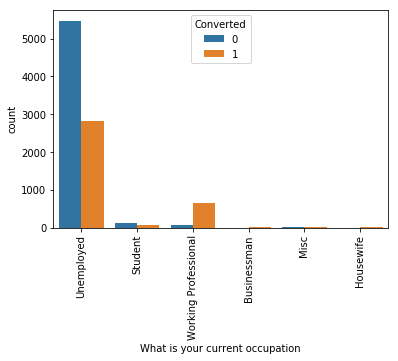

In [91]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer:-
- As per the above graph, working professional are more likely to join.
- However, Unemployed are more in number of conversion ration

In [92]:
#Analyse What matters most to you in choosing a course
df_lead['What matters most to you in choosing a course'].describe()

count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

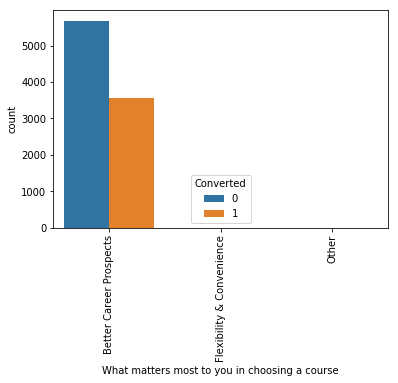

In [93]:
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer:-
- Most of values are for'Better Career Prospects'
- Hence no inference can be drawn

In [94]:
#Analyse search
df_lead['Search'].describe()

count     9240
unique       2
top         No
freq      9226
Name: Search, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

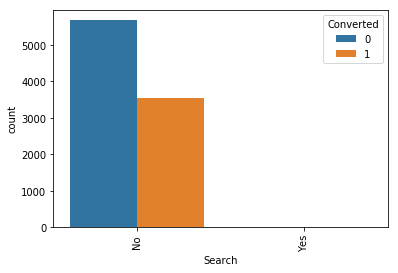

In [95]:
sns.countplot(x = "Search", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer:-
- Most of values are for No
- Hence no inference can be drawn

In [96]:
#Analyse Magazine
df_lead['Magazine'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Magazine, dtype: object

Analyse and Infer:-
- Most of values are for'No'
- Hence no Inference can be drawn
    

In [97]:
#Analyse Newspaper Article
df_lead['Newspaper Article'].describe()

count     9240
unique       2
top         No
freq      9238
Name: Newspaper Article, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

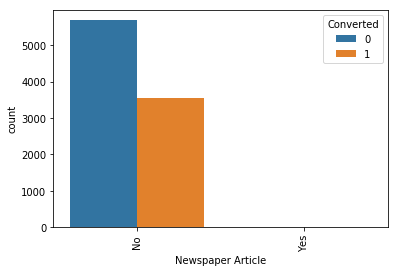

In [98]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer:-
- Most of values are for'No'
- Hence no Inference can be drawn

In [99]:
#Analyse X Education Forums
df_lead['X Education Forums'].describe()

count     9240
unique       2
top         No
freq      9239
Name: X Education Forums, dtype: object

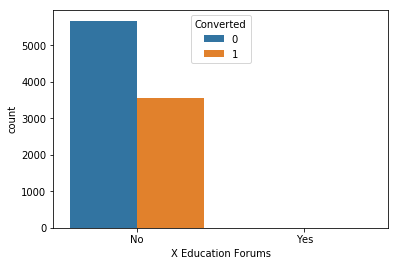

In [100]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df_lead)

Analyse and Infer:-
- Most of values are for 'No'
- Hence no Inference can be drawn

In [101]:
#Analyse Newspaper
df_lead['Newspaper'].describe()

count     9240
unique       2
top         No
freq      9239
Name: Newspaper, dtype: object

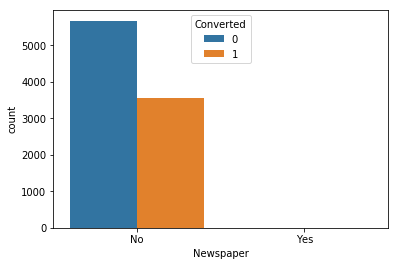

In [102]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df_lead)

Analyse and Infer:-
- Most of values are for 'No'
- Hence no Inference can be drawn

In [103]:
#Analyse Digital Advertisement
df_lead['Digital Advertisement'].describe()

count     9240
unique       2
top         No
freq      9236
Name: Digital Advertisement, dtype: object

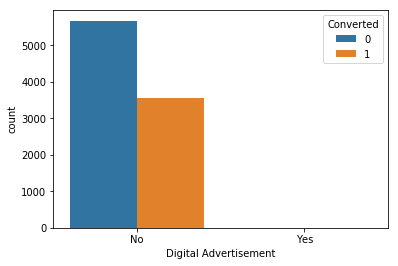

In [104]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df_lead)

Analyse and Infer:-
- Most of values are for 'No'
- Hence no Inference can be drawn

In [105]:
#Analyse Through Recommendations
df_lead['Through Recommendations'].describe()

count     9240
unique       2
top         No
freq      9233
Name: Through Recommendations, dtype: object

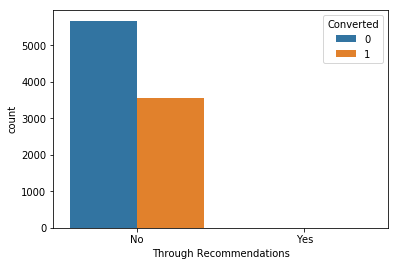

In [106]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df_lead)

Analyse and Infer:-
- Most of values are for 'No'
- Hence no Inference can be drawn

In [107]:
df_lead['Receive More Updates About Our Courses'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Receive More Updates About Our Courses, dtype: object

Analyse and Infer
- As per above most of values are for No. 
- Hence no inference can be drawn

In [108]:
#Analyse Tags
df_lead['Tags'].describe()

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

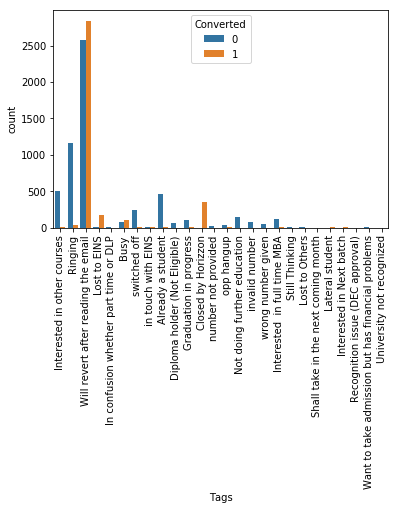

In [109]:
sns.countplot(x = "Tags", hue = "Converted", data = df_lead)
xticks(rotation = 90)

In [110]:
# Grouping the variables which has a very less value or which has no values in the a single group as "Misc"
df_lead['Tags'] = df_lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)', 'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking', 'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch', 'Recognition issue (DEC approval)','Want to take admission but has financial problems', 'University not recognized'], 'Misc')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

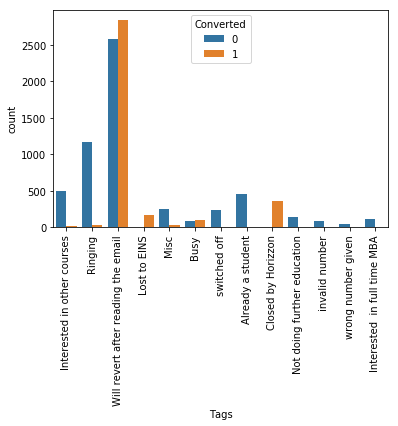

In [111]:
sns.countplot(x = "Tags", hue = "Converted", data = df_lead)
xticks(rotation = 90)

In [112]:
#Analyse Lead Quality
df_lead['Lead Quality'].describe()

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

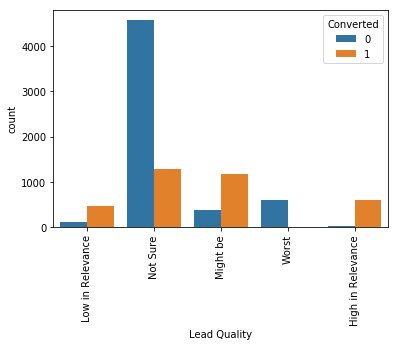

In [113]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer:-
- Most of data is for Not sure
- Hence cannot infer much here

In [114]:
#Analyse Update me on Supply Chain Content
df_lead['Update me on Supply Chain Content'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Update me on Supply Chain Content, dtype: object

Analyse and Infer:-
- Most of values are for 'No'
- Hence no Inference can be drawn

In [115]:
#Analyse Get updates on DM Content
df_lead['Get updates on DM Content'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Get updates on DM Content, dtype: object

Analyse and Infer:-
- Most of values are for 'No'
- Hence no Inference can be drawn

In [116]:
#Analyse city
df_lead['City'].describe()

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

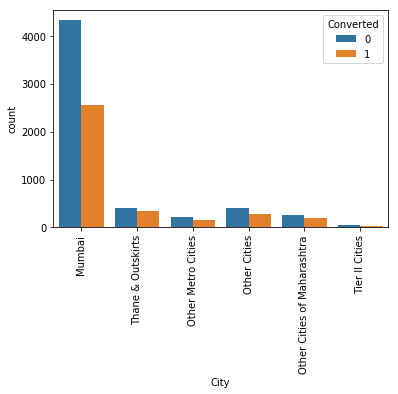

In [117]:
sns.countplot(x = "City", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer:-
- Here most of data is for Mumbai, 
- Also not much conversion rates for others. 
- Hence not much inference can be drawn

In [118]:
#Analyse I agree to pay the amount through cheque
df_lead['I agree to pay the amount through cheque'].describe()

count     9240
unique       1
top         No
freq      9240
Name: I agree to pay the amount through cheque, dtype: object

Analyse and Infer:-
- Most of values are for 'No'
- Hence no Inference can be drawn

In [119]:
#Analyse A free copy of Mastering The Interview
df_lead['A free copy of Mastering The Interview'].describe()

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

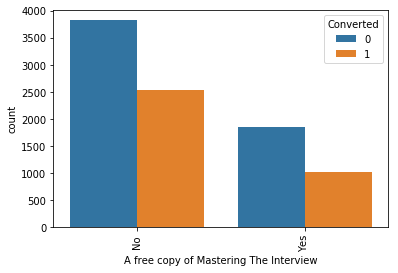

In [120]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_lead)
xticks(rotation = 90)

Analyse and Infer:-
- Most of values are for No
- Also there no much conversion rates
- Hence no Inference can be drawn

In [121]:
#Analyse Last Notable Activity
df_lead['Last Notable Activity'].describe()

count         9240
unique          16
top       Modified
freq          3407
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

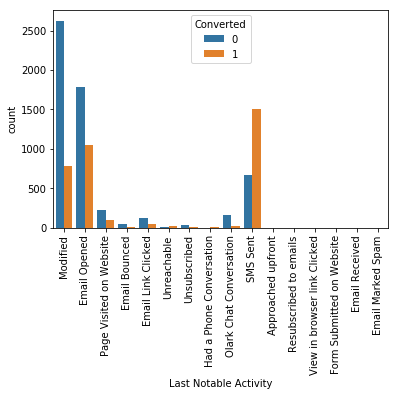

In [122]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_lead)
xticks(rotation = 90)

In [123]:
# Based on the above graph, we can understand that few variables are not proving any value add. So dropping the variables
df_lead = df_lead.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [124]:
df_lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [125]:
df_lead.shape

(9240, 16)

# Data Preparation

In [126]:
#Mapping binary variables like (Yes/No) to 1/0


varlist =  ['Do Not Email', 'Do Not Call']


def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df_lead[varlist] = df_lead[varlist].apply(binary_map)

In [127]:
df_lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [128]:
#Getting dummies for some categorical data and drop the first one
dummy1 = pd.get_dummies(df_lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [129]:
# Concatenate data to the Lead score data
df_lead = pd.concat([df_lead, dummy1], axis=1)
df_lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [130]:
df_lead_copy = df_lead.copy()

In [131]:
# Creating dummies for below
df_lead = df_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [132]:
df_lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [133]:
df_lead.shape

(9240, 87)

Data Split

In [134]:
# Putting feature variable to X
X = df_lead.drop(['Prospect ID','Converted'], axis=1)

In [135]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [136]:
# Putting response variable to y
y = df_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [137]:
# Splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Standardising Feature using Standard Scalar

In [138]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.152121,-0.885371,-1.269958,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.297240,0.005716,-0.519633,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.659580,-0.691418,0.140427,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.659580,1.365219,1.550812,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-1.152121,-0.885371,-1.269958,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [139]:
# Get the converted Rate
Converted_Rate = (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100
Converted_Rate

38.53896103896104

Which is around 38.53%

# Model Building

In [140]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6384
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        22:28:39   Pearson chi2:                 3.80e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.756e+15   2.84e+07  -6.18e+07      0.000   -1.76e+15   -1.76e+15
Do Not Email                                         -2.509e+14   4.41e+06  -5.69e+07      0.000   -2.51e+14   -2.51e+14
Do Not Call                                           7.757e+15   4.78e+07   1.62e+08      0.000    7.76e+15    7.76e+15
TotalVisits                                           5.551e+13   1.34e+06   4.16e+07      0.000    5.55e+13    5.55e+13
Total Time Spent on Website                           2.832e+14   9.94e+05   2.85e+08      0.000    2.83e+14    2.83e+14
Page Views Per Visit                                 -7.335e+13   1.54e+06  -4.77e+07      0.000   -7.34e+13   -7.34e+13
Lead Origin_Landing Page Submission                  -2.558e+14   3.16e+06   -8.1e+07      0.000   -2.56e+14   -2.56e+14
Lead Origin_Lead Add Form                             3.237e+14   1.23e+07   2.63e+07      0.000    3.24e+14    3.24e+14
Lead Origin_Lead Import                               1.417e+15   4.82e+07   2.94e+07      0.000    1.42e+15    1.42e+15
Lead Origin_Quick Add Form                             -3.3e+14    6.8e+07  -4.86e+06      0.000    -3.3e+14    -3.3e+14
Lead Source_Facebook                                 -1.254e+15   4.82e+07   -2.6e+07      0.000   -1.25e+15   -1.25e+15
Lead Source_Google                                     4.79e+13   2.46e+06   1.95e+07      0.000    4.79e+13    4.79e+13
Lead Source_Misc                                     -4.928e+13   1.63e+07  -3.02e+06      0.000   -4.93e+13   -4.93e+13
Lead Source_Olark Chat                                 2.47e+14   3.91e+06   6.32e+07      0.000    2.47e+14    2.47e+14
Lead Source_Organic Search                            1.739e+14   2.97e+06   5.86e+07      0.000    1.74e+14    1.74e+14
Lead Source_Reference                                -1.162e+14   1.28e+07  -9.07e+06      0.000   -1.16e+14   -1.16e+14
Lead Source_Referral Sites                            6.075e+13   7.54e+06   8.06e+06      0.000    6.07e+13    6.07e+13
Lead Source_Welingak Website                           6.39e+14   1.41e+07   4.52e+07      0.000    6.39e+14    6.39e+14
Last Activity_Email Bounced                          -9.592e+13   7.51e+06  -1.28e+07      0.000   -9.59e+13   -9.59e+13
Last Activity_Email Link Clicked                      3.819e+14   9.36e+06   4.08e+07      0.000    3.82e+14    3.82e+14
Last Activity_Email Opened                            3.547e+13   5.22e+06    6.8e+06      0.000    3.55e+13    3.55e+13
Last Activity_Form Submitted on Website               1.645e+14   8.59e+06   1.92e+07      0.000    1.65e+14    1.65e+14
Last Activity_Misc                                    3.906e+14   1.45e+07   2.69e+07      0.000    3.91e+14    3.91e+14
Last Activity_Ol

Implementing RFE for feature selection

In [141]:
#Selecting around 15 features
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [142]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 24),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 32),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 53),
 ('Lead Source_Misc', False, 52),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 43),
 ('Last Activity_Email Opened', False, 45),
 ('Last Activity_Form Submitted on Website', False, 46),
 ('Last Activity_Misc', False, 27),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Page Visited on Website', Fals

In [143]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [144]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Misc', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Misc',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Manage

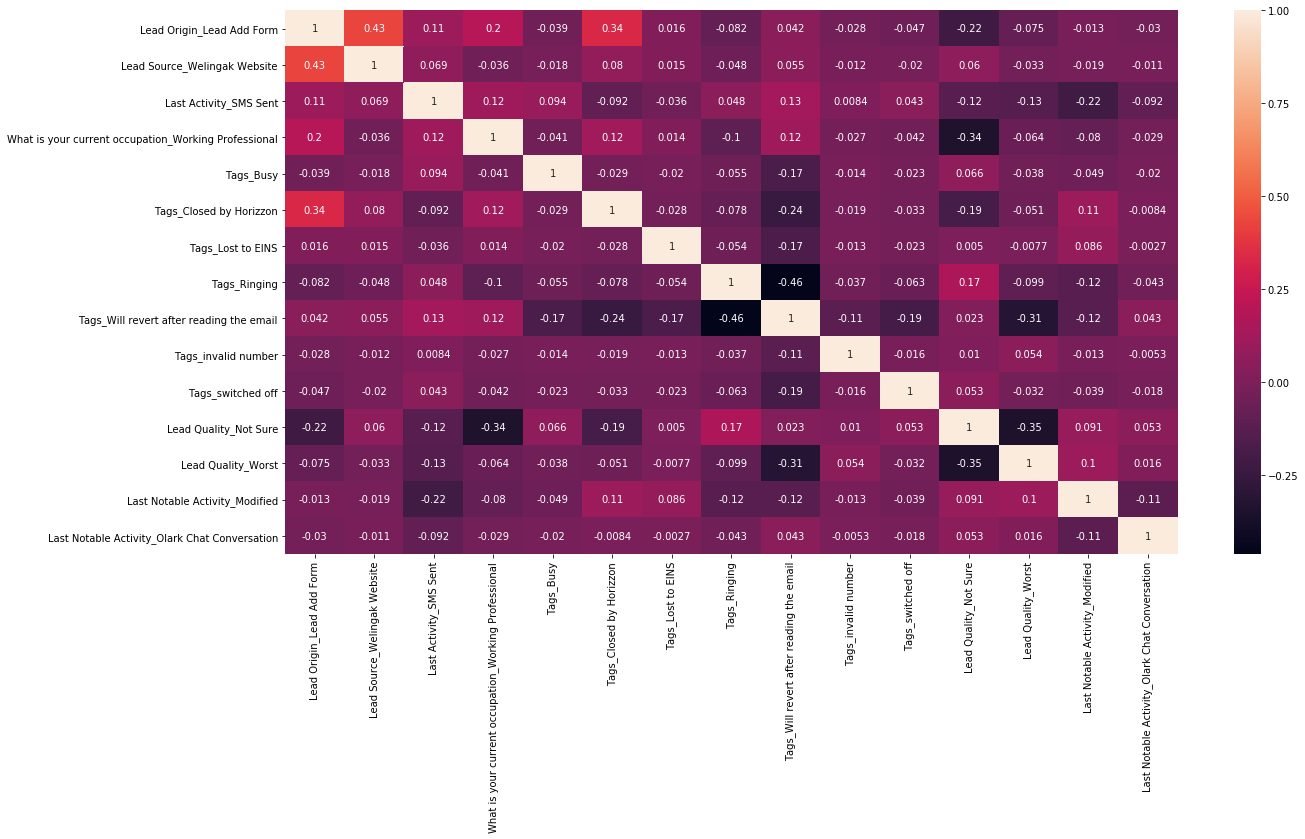

In [145]:
#Drawing Correlation
plt.figure(figsize = (20,10))  
sns.heatmap(df_lead[col].corr(), annot=True)

By looking at correlation matrix, there are some, Tags_Will revert after reading with email 0.46 with Tags_ringing
and Leady Quality_Might be with Lead Quality_Not sure around 0.59.
Hence will drop Tags_Will revert after reading with email and Lead Quality_Not sure whose correlation is around 0.5

In [146]:
X_test2 = X_test.drop(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website'],1)
X_train2 = X_train.drop(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website'],1)

In [147]:
col1 = col.delete(col.get_indexer(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website']))


In [148]:
col1

Index(['Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

Draw Correlation once again

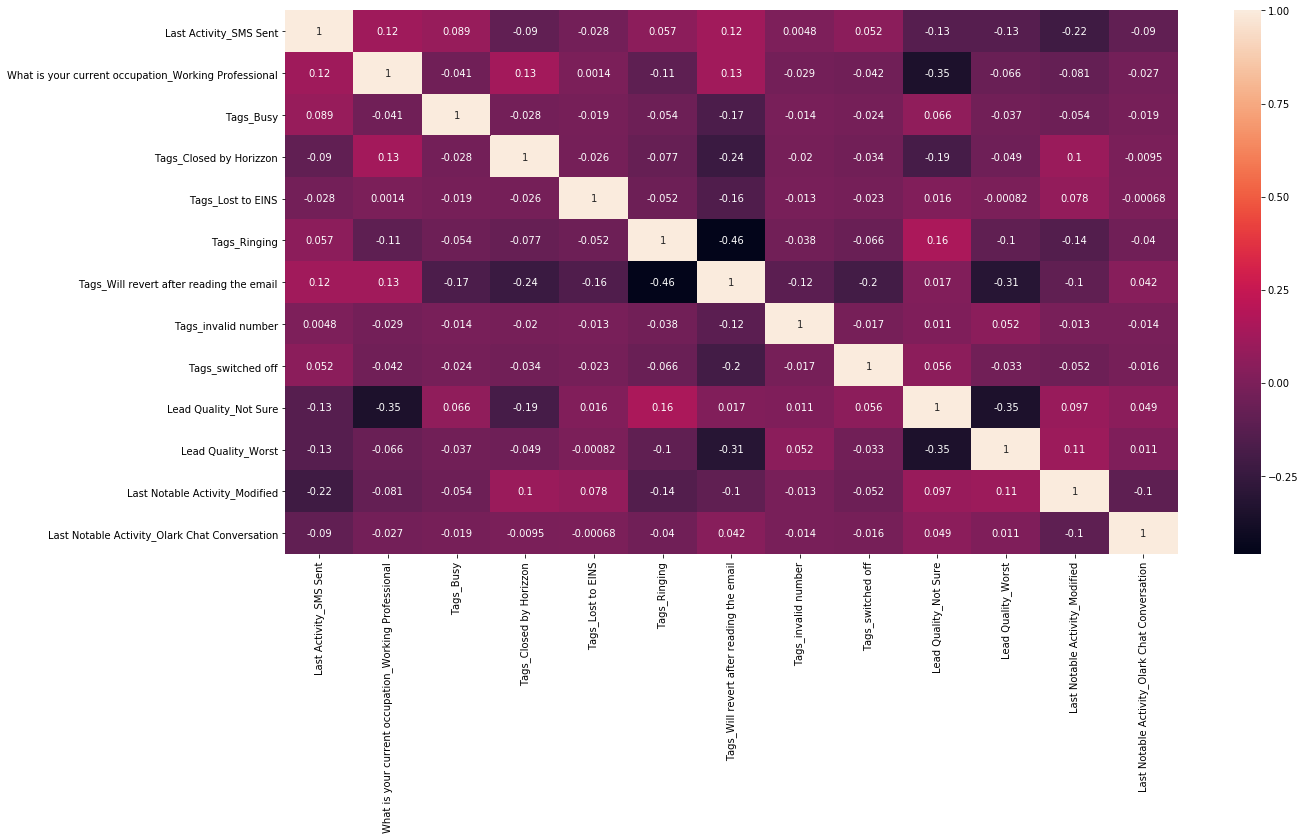

In [149]:
#Drawing Correlation
plt.figure(figsize = (20,10))  
sns.heatmap(X_train2[col1].corr(), annot=True)

By looking above, we can understand there are no any variables to drop with correlation around 0.5

In [150]:
X_train2 = X_train2[col1]

In [151]:
X_test2 = X_test2[col1]

Re-Running the Model

In [152]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1649.0
Date:                Mon, 26 Aug 2019   Deviance:                       3297.9
Time:                        22:28:48   Pearson chi2:                 3.40e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2384      0.210     -5.883      0.000      -1.651      -0.826
Last Activity_SMS Sent                                   1.9863      0.099     20.139      0.000       1.793       2.180
What is your current occupation_Working Professional     1.3607      0.281      4.838      0.000       0.809       1.912
Tags_Busy                                                3.5018      0.311     11.257      0.000       2.892       4.111
Tags_Closed by Horizzon                                  9.7659      1.040      9.394      0.000       7.728      11.804
Tags_Lost to EINS                                        9.4248      0.756     12.471      0.000       7.944      10.906
Tags_Ringing                                            -1.7685      0.310     -5.709      0.000      -2.376      -1.161
Tags_Will revert after reading the email                 3.7074      0.224     16.559      0.000       3.269       4.146
Tags_invalid number                                     -2.1742      1.107     -1.964      0.050      -4.344      -0.005
Tags_switched off                                       -2.5196      0.576     -4.376      0.000      -3.648      -1.391
Lead Quality_Not Sure                                   -3.4088      0.131    -26.008      0.000      -3.666      -3.152
Lead Quality_Worst                                      -3.5097      0.684     -5.132      0.000      -4.850      -2.169
Last Notable Activity_Modified                          -1.6407      0.101    -16.175      0.000      -1.839      -1.442
Last Notable Activity_Olark Chat Conversation           -1.4004      0.363     -3.855      0.000      -2.112      -0.688
========================================================================================================================
"""

In [153]:
#Removing Tags_Busy which is having 0.413 p value
col2 = col1.drop('Tags_Busy',1)

In [154]:
X_train3 = X_train2[col2]
X_test3 = X_test2[col2]

Rerunning the model

In [155]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train3)), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1717.3
Date:                Mon, 26 Aug 2019   Deviance:                       3434.7
Time:                        22:28:49   Pearson chi2:                 3.11e+04
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1436      0.152     -0.945      0.345      -0.442       0.154
Last Activity_SMS Sent                                   2.1112      0.099     21.420      0.000       1.918       2.304
What is your current occupation_Working Professional     1.3214      0.255      5.178      0.000       0.821       1.822
Tags_Closed by Horizzon                                  8.4883      1.025      8.284      0.000       6.480      10.497
Tags_Lost to EINS                                        8.2727      0.749     11.046      0.000       6.805       9.741
Tags_Ringing                                            -3.0212      0.271    -11.157      0.000      -3.552      -2.490
Tags_Will revert after reading the email                 2.3469      0.147     15.933      0.000       2.058       2.636
Tags_invalid number                                     -3.3924      1.098     -3.090      0.002      -5.544      -1.240
Tags_switched off                                       -3.7562      0.556     -6.759      0.000      -4.845      -2.667
Lead Quality_Not Sure                                   -3.1040      0.116    -26.649      0.000      -3.332      -2.876
Lead Quality_Worst                                      -4.4314      0.615     -7.204      0.000      -5.637      -3.226
Last Notable Activity_Modified                          -1.7269      0.099    -17.431      0.000      -1.921      -1.533
Last Notable Activity_Olark Chat Conversation           -1.4324      0.354     -4.047      0.000      -2.126      -0.739
========================================================================================================================
"""

Checking VIF

In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Will revert after reading the email,1.28
1,What is your current occupation_Working Profes...,1.27
10,Last Notable Activity_Modified,1.12
4,Tags_Ringing,1.11
6,Tags_invalid number,1.06
9,Lead Quality_Worst,1.03
3,Tags_Lost to EINS,0.62
8,Lead Quality_Not Sure,0.15
7,Tags_switched off,0.14
2,Tags_Closed by Horizzon,0.13


There are no any variables >=5. Hence skipping to next step

In [157]:
X_test3.shape

(2772, 12)

In [158]:
X_train3.shape

(6468, 12)

### Making Predictions

In [159]:
X_train_sm = sm.add_constant(X_train3)

In [160]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.001891
6795    0.288898
3516    0.001891
8105    0.258539
3934    0.067379
4844    0.996445
3297    0.001891
8071    0.999644
987     0.067379
7423    0.986803
dtype: float64

In [161]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00189092, 0.28889777, 0.00189092, 0.25853863, 0.06737903,
       0.99644505, 0.00189092, 0.99964359, 0.06737903, 0.98680293])

In [162]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.001891,1871
1,0,0.288898,6795
2,0,0.001891,3516
3,0,0.258539,8105
4,0,0.067379,3934


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [163]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.001891,1871,0
1,0,0.288898,6795,0
2,0,0.001891,3516,0
3,0,0.258539,8105,0
4,0,0.067379,3934,0


In [164]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3856  146]
 [ 420 2046]]


In [165]:
# Predicted     not_converted    converted
# Actual
# not_converted        3856           146
# converted            420            2046 

In [166]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.829683698296837

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.9635182408795602

In [169]:
# Calculate false postive rate - predicting churn when customer does not have converted
print(FP/ float(TN+FP))

0.03648175912043978


In [170]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9333941605839416


In [171]:
# Negative predictive value
print (TN / float(TN+ FN))

0.90177736202058


In [172]:
#Verifying over all accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9124922696351268


Over all accuracy is around 91%. So that we can conclude it is a good model

In [173]:
#Drawing roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

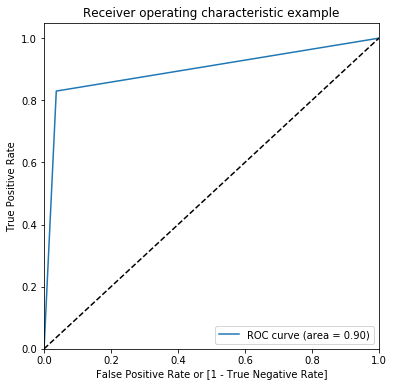

(array([0.        , 0.03648176, 1.        ]),
 array([0.       , 0.8296837, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [174]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [175]:
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

'0.95'

We see an overall AUC score of 0.95 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- We can use PCA to reduce the effort

PCA on the data

In [176]:
X_train3.shape

(6468, 12)

There 12 Features

In [177]:
pca = PCA(svd_solver='randomized', random_state=42)

In [178]:
#Doing the PCA on the train data
pca.fit(X_train3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [179]:
pca.components_

array([[ 4.72713006e-01,  1.56735227e-01, -4.77881849e-02,
        -2.98614533e-02, -1.88640209e-01,  5.91032072e-01,
        -9.83134466e-03, -2.28394063e-02, -3.37563059e-01,
        -7.97405346e-02, -4.92896868e-01,  4.90287924e-03],
       [ 2.16817470e-01,  8.94793057e-02,  7.96436551e-02,
         1.38787182e-02,  2.69064197e-01, -6.53462781e-01,
         1.29685430e-02,  3.66570580e-02, -5.58230985e-01,
         1.77187592e-01, -3.07155269e-01, -1.28530800e-02],
       [-2.47780479e-01,  1.53295541e-01,  8.69462822e-02,
         7.49743321e-03, -3.65030088e-01,  1.50705245e-01,
        -4.34951325e-03, -3.67468306e-02, -6.50744985e-01,
         1.88112360e-01,  5.39513931e-01, -1.51849466e-02],
       [ 7.99392991e-01, -7.82602417e-03, -7.07737046e-03,
         1.51938358e-02,  5.90449065e-02, -8.42926045e-02,
         1.39809832e-03,  1.75010429e-02,  1.03208562e-01,
        -5.49536345e-02,  5.77083619e-01, -5.50586892e-02],
       [-1.50823392e-01,  4.18731528e-01,  9.9704430

In [180]:
colnames = list(X_train3.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.472713,0.216817,Last Activity_SMS Sent
1,0.156735,0.089479,What is your current occupation_Working Profes...
2,-0.047788,0.079644,Tags_Closed by Horizzon
3,-0.029861,0.013879,Tags_Lost to EINS
4,-0.188640,0.269064,Tags_Ringing


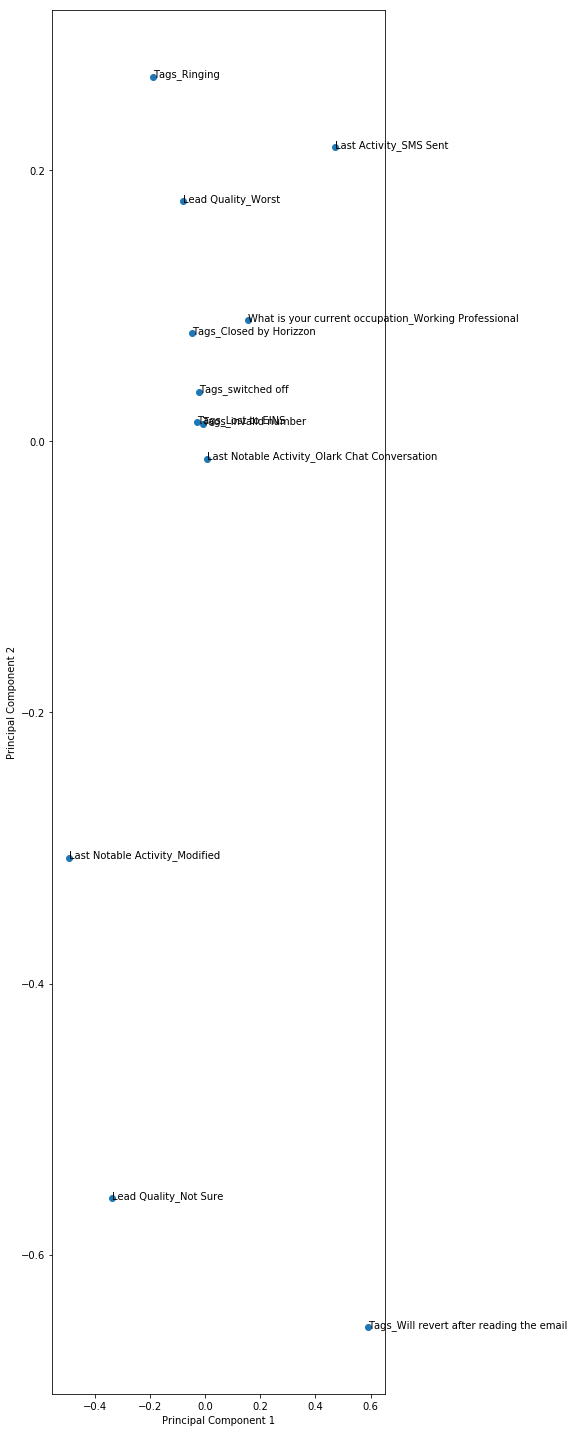

In [181]:
%matplotlib inline
fig = plt.figure(figsize = (8,20))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see that the fist component is in the direction where the 'Last Activity_SMS sent' variables are heavy
 - These are few components also have the highest of the loadings ex: Lead Quality Worst, Tags Closed by Horizon etc

#### Looking at the screeplot to assess the number of needed principal components

In [182]:
pca.explained_variance_ratio_

array([0.25172936, 0.21190478, 0.18883687, 0.13477396, 0.05973975,
       0.04947405, 0.03314784, 0.02251514, 0.01647672, 0.01380009,
       0.01075034, 0.00685109])

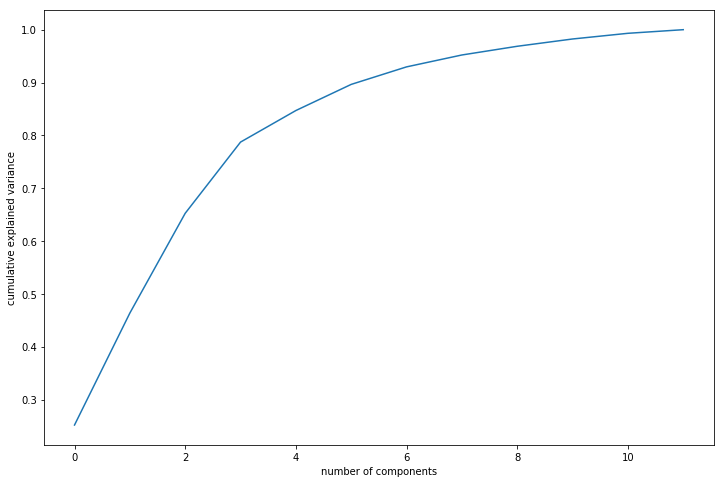

In [183]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 16 components are enough to describe 95% of the variance in the dataset
- We'll choose 9 components for our modeling

#### Basis transformation - getting the data onto our PCs

In [184]:
pca_final = IncrementalPCA(n_components=9)
df_train_pca = pca_final.fit_transform(X_train3)
df_train_pca.shape

(6468, 9)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [185]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

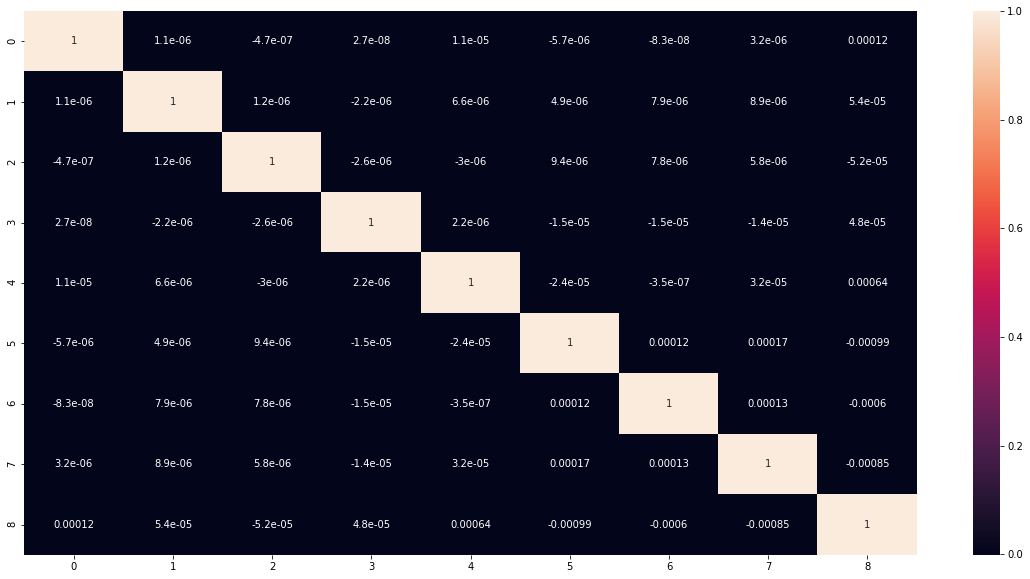

In [186]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [187]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0006365639551363156 , min corr:  -0.0009860268885539278


#### Indeed - there is no correlation between any two components!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [188]:
#Applying selected components to the test data - 9 components
df_test_pca = pca_final.transform(X_test3)
df_test_pca.shape

(2772, 9)

#### Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any important information

In [189]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

**Note**

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is *linear*, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear.

In [190]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.93'

roc_auc_score with out PCA was 0.95 where as with PCA is 0.93 which is closer.
Hence we can also conclude that PCA with 9 components also has good coverage

# Assigning Lead Score

In [191]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Lead_Score
0,0,0.001891,1871,0,0
1,0,0.288898,6795,0,29
2,0,0.001891,3516,0,0
3,0,0.258539,8105,0,26
4,0,0.067379,3934,0,7


In [192]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [193]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.829683698296837

In [194]:
# Let us calculate specificity
TN / float(TN+FP)

0.9635182408795602

In [195]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03648175912043978


In [196]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9333941605839416


In [197]:
# Negative predictive value
print (TN / float(TN+ FN))

0.90177736202058


In [198]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3856,  146],
       [ 420, 2046]], dtype=int64)

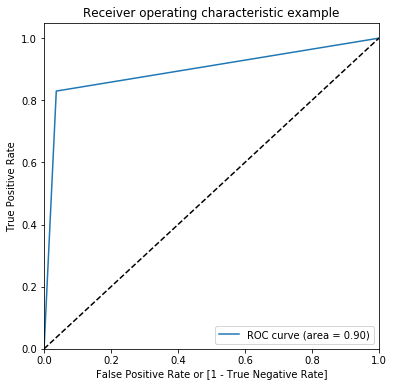

(array([0.        , 0.03648176, 1.        ]),
 array([0.       , 0.8296837, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [199]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

We see an overall AUC score of 0.95 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- We can use PCA to reduce the effort

In [200]:
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

'0.95'

Over all 95% accuracy

# Converted Vs Predicted

In [201]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      1
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      0
 21      1
 22      1
 23      1
 24      1
 25      

In [202]:
final_list_with_80_Percent_conversion_rate = y_train_pred_final[y_train_pred_final.Converted_prob>=0.8]

In [203]:
len(final_list_with_80_Percent_conversion_rate)

1624

There are around 1624 customers with atleast 80% probability of converting

In [204]:
final_list_with_80_Percent_conversion_rate.head()

,Converted,Converted_prob,Prospect ID,predicted,Lead_Score
5,1,0.996445,4844,1,100
7,1,0.999644,8071,1,100
9,1,0.986803,7423,1,99
11,0,0.986803,6542,1,99
12,1,0.900539,4317,1,90


In [205]:
# sorting data frame based on high lead_scores
final_list_with_80_Percent_conversion_rate = final_list_with_80_Percent_conversion_rate.sort_values(by='Lead_Score', ascending=False)
final_list_with_80_Percent_conversion_rate.head()

,Converted,Converted_prob,Prospect ID,predicted,Lead_Score
5,1,0.996445,4844,1,100
1702,1,0.996445,4543,1,100
1520,1,0.999838,3687,1,100
1517,1,0.996445,2672,1,100
5459,1,0.998665,8704,1,100
